In [1]:
##example notebook of genotype simulation

In [2]:
from project_lib.genotype_simulation import *
from project_lib.stat_functions import *

C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:158: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.head(1) - 1), rate=0
C:\Users\PHLUP\miniconda3\envs\masterarbeit\Lib\site-packages\stdpopsim\catalog\HomSap\demographic_models.py:161: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  time=int(extended_GF.time.tail(1) + 1), rate=0


In [3]:
#read genetic map
genmap = pd.read_csv("data/sim_data/B73_genmap.csv")
#read parent genotypes
parent_genos = pd.read_csv("data/sim_data/NAM_parent_genos.csv")
#read reference allele
ref_allele = pd.read_csv("data/sim_data/B73_alleles.csv")
# read population names
populations = pd.read_csv("data/sim_data/populations.csv")

In [4]:
pop_dict = dict(zip(populations["pop"], populations["name"]))
size_dict = dict(zip(populations["pop"], populations["size"]))
pops = populations["pop"]

In [5]:
genmap_high = genmap.copy()
genmap_high["Rate(cM/Mb)"] += 5
#ensure last recombination rate is 0 at every chromosome (requirement for msprime)
genmap_high.loc[genmap_high.groupby("Chromosome").tail(1).index, "Rate(cM/Mb)"] = 0
#genmap with 0 recombination rate
genmap_zero = genmap.copy()
genmap_zero["Rate(cM/Mb)"] = 0
# genmap with constant recombination rate (mean over all recombination)
genmap_mean = genmap.copy()
genmap_mean["Rate(cM/Mb)"] = genmap["Rate(cM/Mb)"].mean()
genmap_mean.loc[genmap_mean.groupby("Chromosome").tail(1).index, "Rate(cM/Mb)"] = 0

In [6]:
whole_sim = genotype_simulation(genetic_map = genmap_zero, parent_genos = parent_genos, ref_allele = ref_allele, 
                                founder_list = list(["B73", "B97"]), offspring = 3, selfing_genos = 5)

starting simulation
finished chromsome 1
finished chromsome 2
finished chromsome 3
finished chromsome 4
finished chromsome 5
finished chromsome 6
finished chromsome 7
finished chromsome 8
finished chromsome 9
finished chromsome 10


In [7]:
whole_sim[0]

,individual,PZA01271.1,PZA03613.1,PZA02129.1,PZA02032.1,PHM2244.142,PZA02372.1,PHM6238.36,PZA00181.2,PZA00528.1,...,PZA03604.1,PZA00130.9,PZA02969.9,PZA02049.1,PZA00007.1,PHM5435.25,PZA01073.1,PZA01001.2,PZA02578.1,PZA00062.4
0,17,GG,TT,CC,AA,GG,TT,AA,TT,CC,...,TT,CC,CC,GG,CC,AA,AA,TT,CC,CC
1,18,GG,TT,CC,AA,GG,TT,AA,TT,CC,...,CC,CC,TT,CC,AA,GG,GG,CC,TT,TT
2,19,CC,AA,TT,TT,CC,TT,AA,GG,AA,...,TT,CC,CC,GG,CC,AA,AA,TT,CC,CC


In [10]:
print(whole_sim[1][0].dump_tables())

TableCollection

Sequence Length: 297570924.0
Time units: generations
Metadata: b''

Individuals
╔══╤═════╤════════╤═══════╤═════════════════╗
║id│flags│location│parents│metadata         ║
╠══╪═════╪════════╪═══════╪═════════════════╣
║0 │    0│        │ -1, -1│ {'file_id': '0'}║
║1 │    0│        │ -1, -1│ {'file_id': '1'}║
║2 │    0│        │   0, 1│ {'file_id': '2'}║
║3 │    0│        │   0, 1│ {'file_id': '3'}║
║4 │    0│        │   0, 1│ {'file_id': '4'}║
║5 │    0│        │   2, 2│ {'file_id': '5'}║
║6 │    0│        │   3, 3│ {'file_id': '6'}║
║7 │    0│        │   4, 4│ {'file_id': '7'}║
║8 │    0│        │   5, 5│ {'file_id': '8'}║
║9 │    0│        │   6, 6│ {'file_id': '9'}║
║10│    0│        │   7, 7│{'file_id': '10'}║
║11│    0│        │   8, 8│{'file_id': '11'}║
║12│    0│        │   9, 9│{'file_id': '12'}║
║13│    0│        │ 10, 10│{'file_id': '13'}║
║14│    0│        │ 11, 11│{'file_id': '14'}║
║15│    0│        │ 12, 12│{'file_id': '15'}║
║16│    0│        │ 13, 13│{'

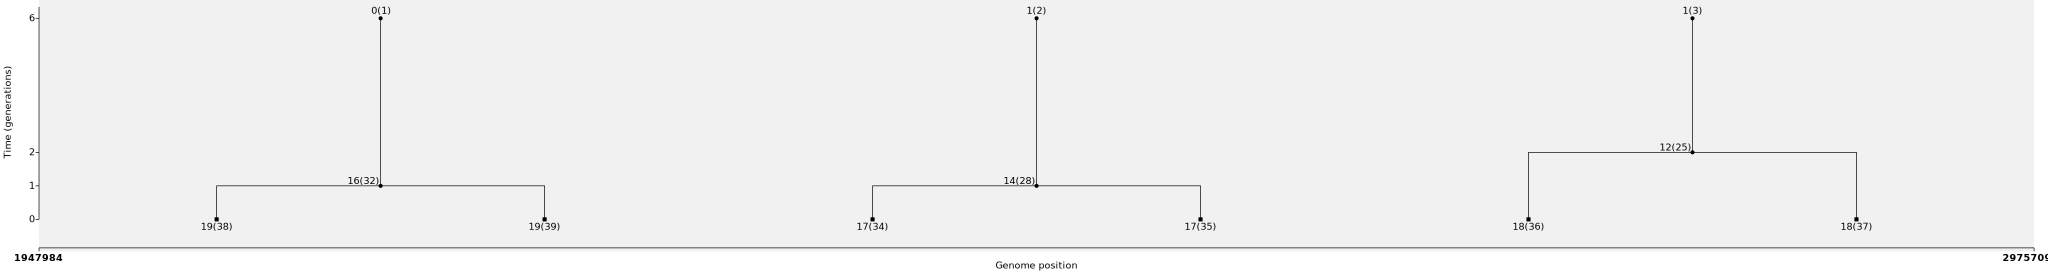

In [12]:
draw_ancestry(whole_sim[1][0])

In [13]:
calc_total_recomb(whole_sim[1])

(199.7455372, 20.0)